loading package and scenic object

In [2]:
library(ggplot2)
library(cowplot)
library(dplyr)
library(scran)
library(biomaRt)
library(tibble)
library(AnnotationHub)
library(patchwork)
library(SingleR)
library(Seurat)
library(rliger)
library(SeuratData)
library(magrittr)
library(SeuratWrappers)
library(celldex)
library(scuttle)
library(scRNAseq)
library(SeuratDisk)
library(viridis)
library(tidyr)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union


Le chargement a nécessité le package : SingleCellExperiment

Le chargement a nécessité le package : SummarizedExperiment

Le chargement a nécessité le package : MatrixGenerics

Le chargement a nécessité le package : matrixStats


Attachement du package : ‘matrixStats’


L'objet suivant est masqué depuis ‘package:dplyr’:

    count



Attachement du package : ‘MatrixGenerics’


Les objets suivants sont masqués depuis ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, c

In [3]:
custom_colors <- list()

colors_dutch <- c("#16a085", "#2980b9", "#4834d4", "#f39c12", "#c0392b",
                  "#130f40", "#f78fb3", "#65d6ce", "#d1c145", "#2ecc71",
                  "#d35400", "#c44569", '#ff7f50', '#706fd3', '#f9ca24',
                  '#34ace0', '#33d9b2', '#2c2c54', '#be2edd')

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

In [4]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [4]:
ref <- Connect(filename = "/home/adufour/work/microglia/dev_all_v2.loom", mode = "r")

In [30]:
microglia <- readRDS("/home/adufour/work/rds_storage/microglia/microglia.rds")

In [1]:
predictions <- readRDS("/home/adufour/work/rds_storage/microglia/predictions.rds")

In [31]:
microglia$predictions <- predictions$labels

In [33]:
microglia@meta.data[which(!microglia$predictions %in% c("Non-cycling microglia", "Non-cycling perivascular macrophages", "Cycling microglia", "Axon tract-associated microglia", "Cycling perivascular macrophages", "Non-cycling perivascular macrophages", "Infiltrating microglia")),]$predictions <- "Infiltrating Contaminants"

In [39]:
Idents(microglia) <- "seurat_clusters"
microglia_filter <- subset(x = microglia, idents = c("0", "1", "2", "3", "4", "5", "6", "7"))

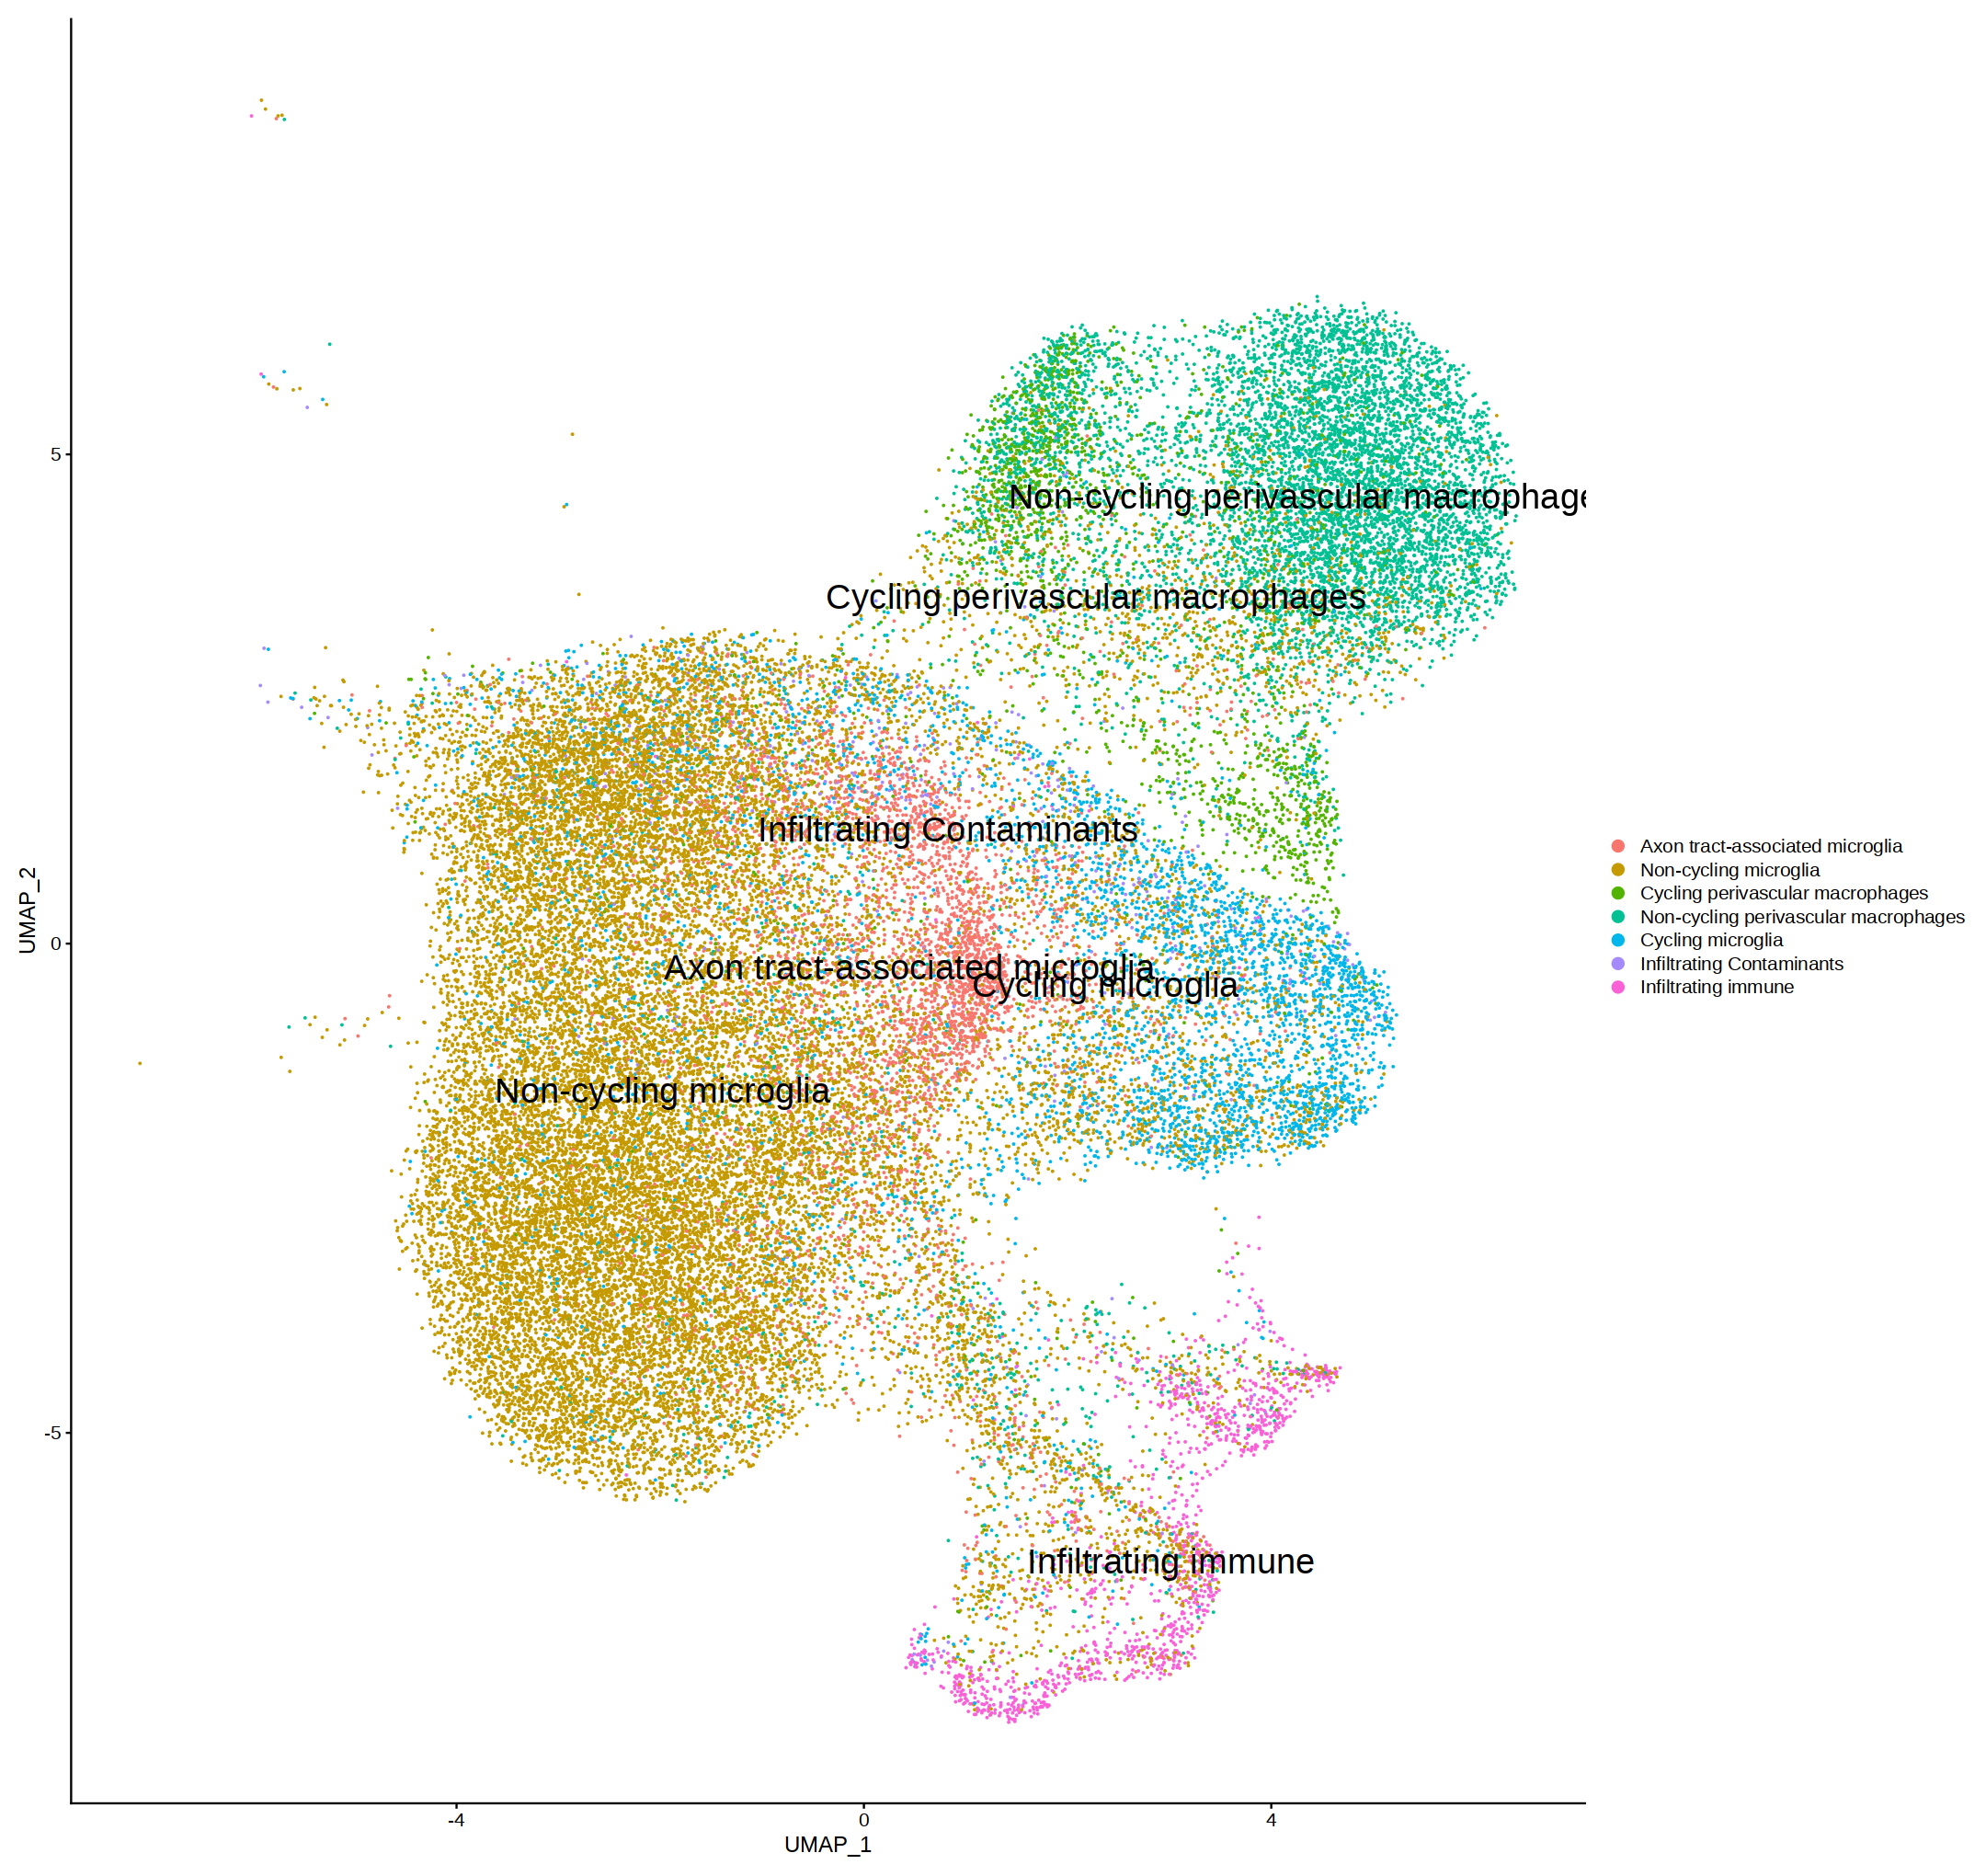

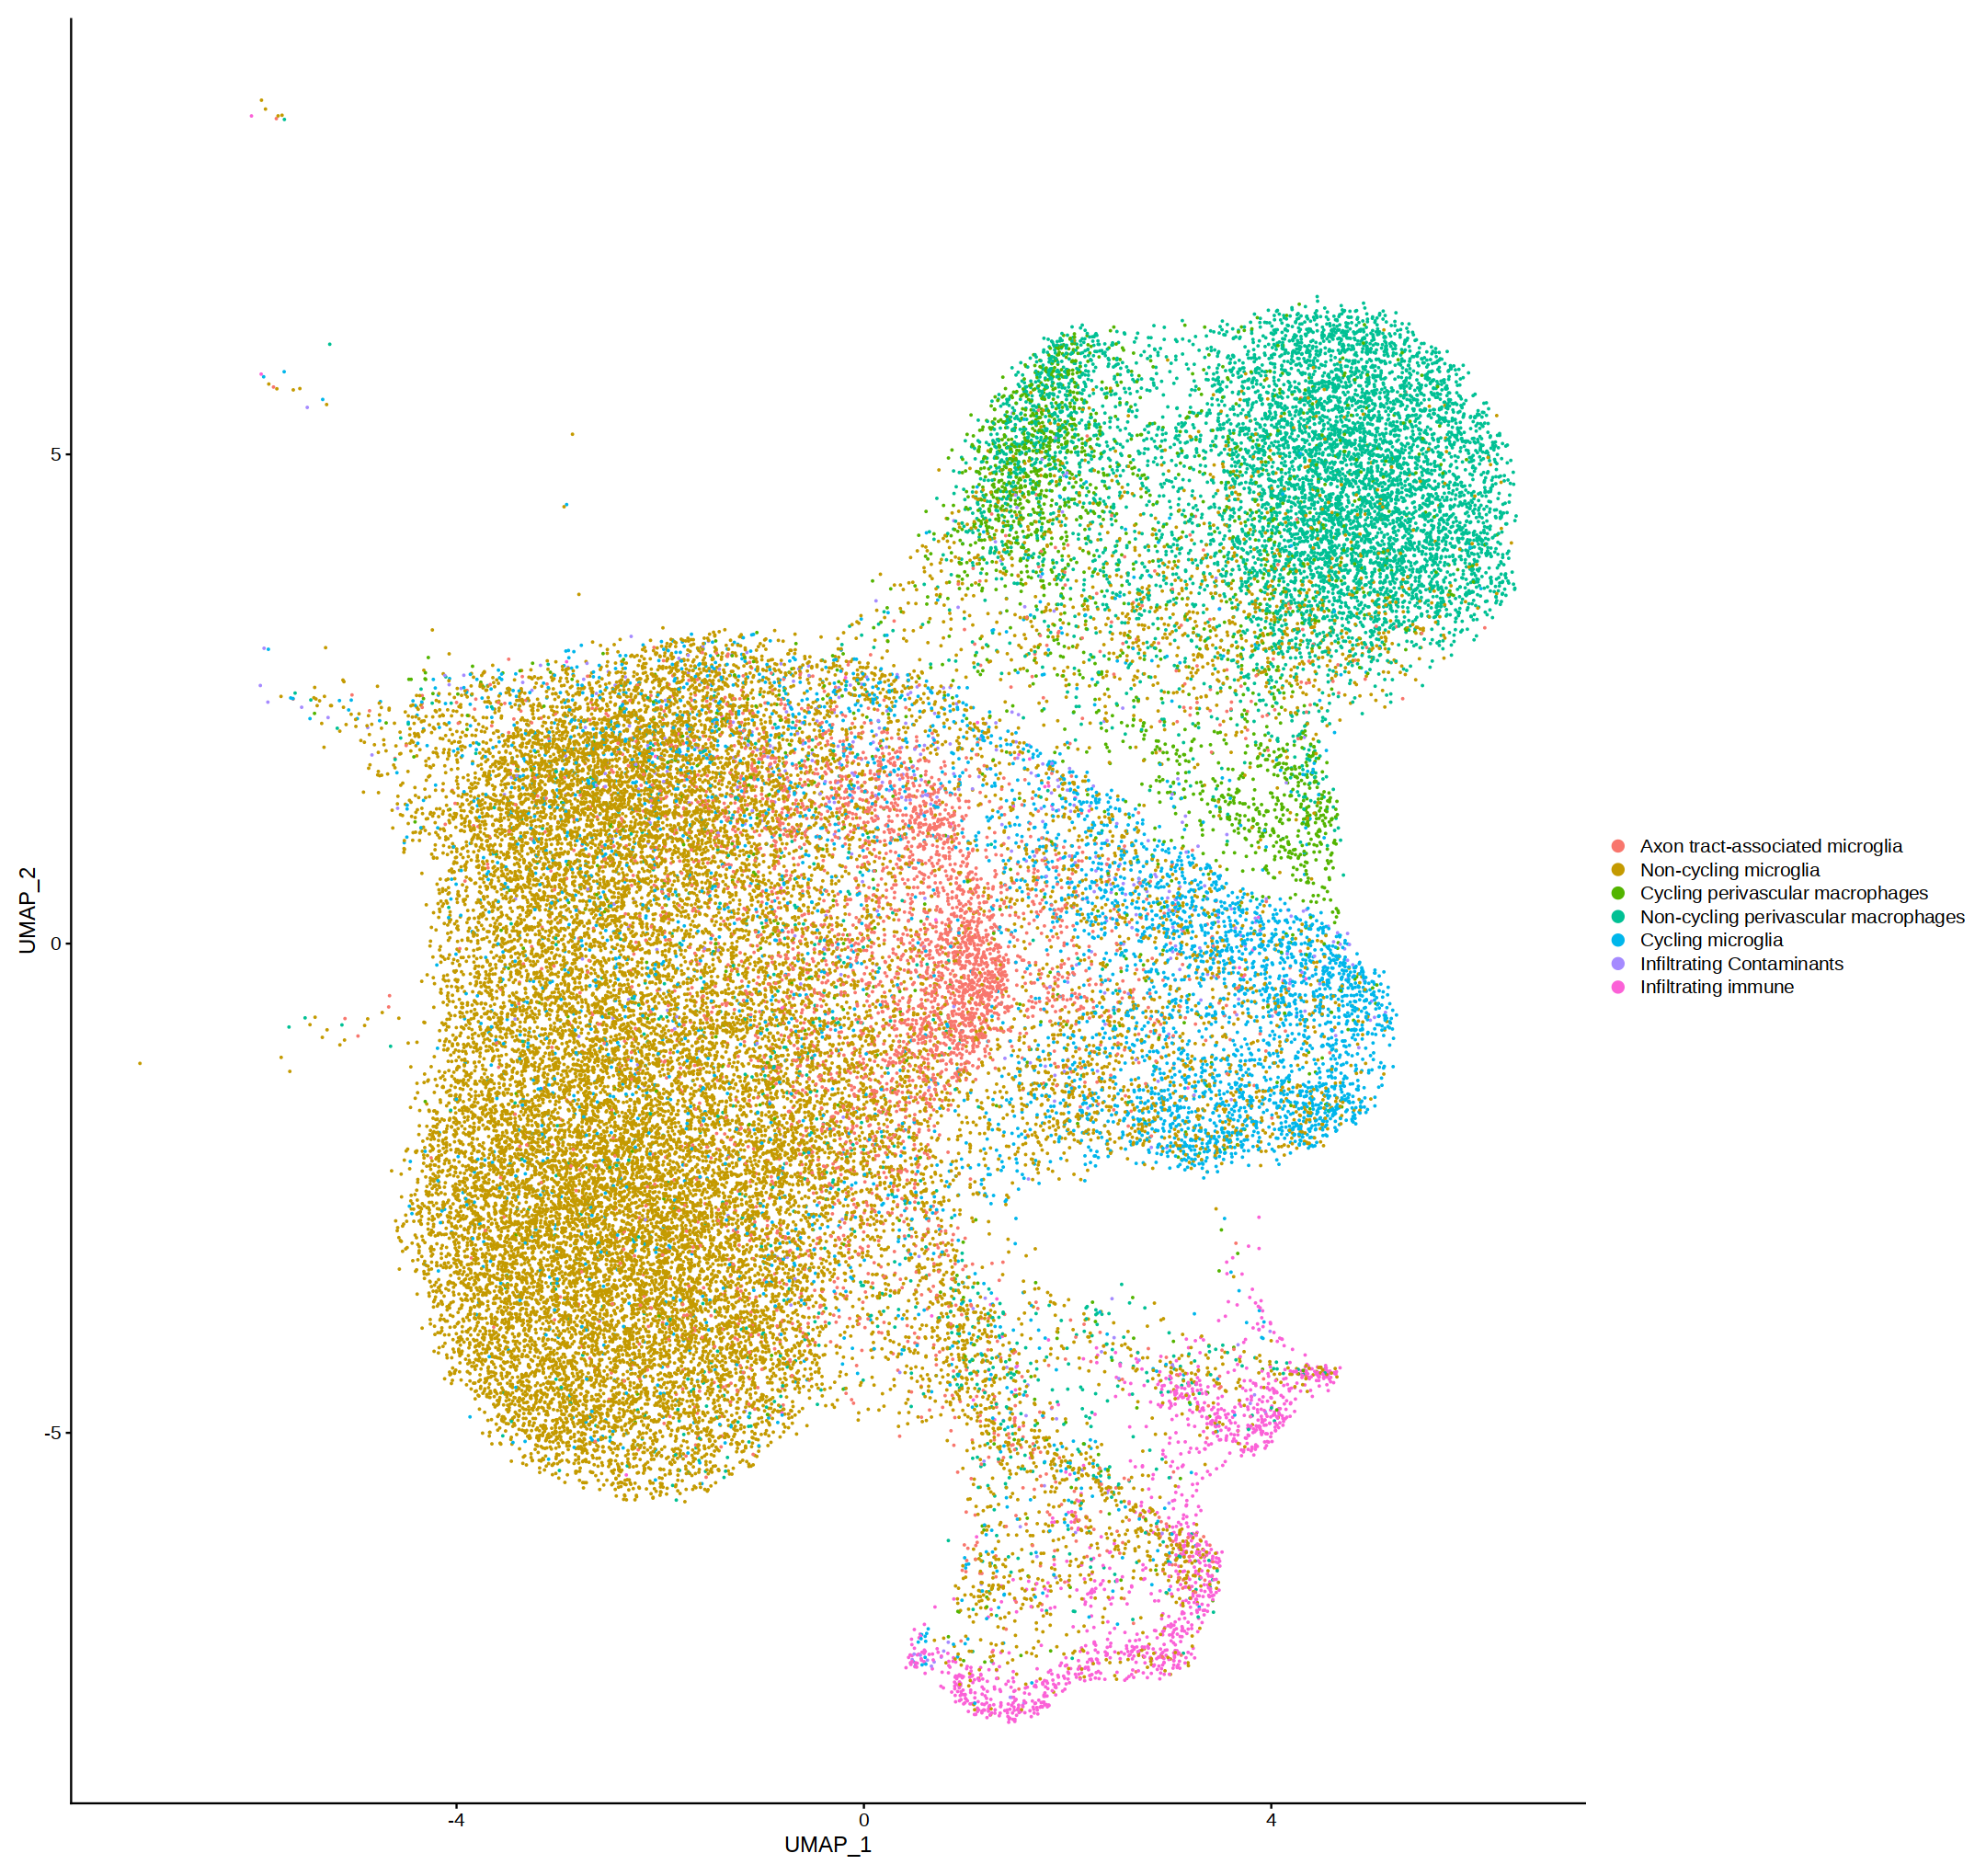

In [35]:
Idents(microglia_filter) <- "predictions"
DimPlot(microglia_filter, reduction = "umap", label = TRUE, label.size = 8)
DimPlot(microglia_filter, reduction = "umap", label = FALSE, label.size = 8)

In [37]:
options(repr.plot.width=20, repr.plot.height=20) # To set the figure size in Jupyter

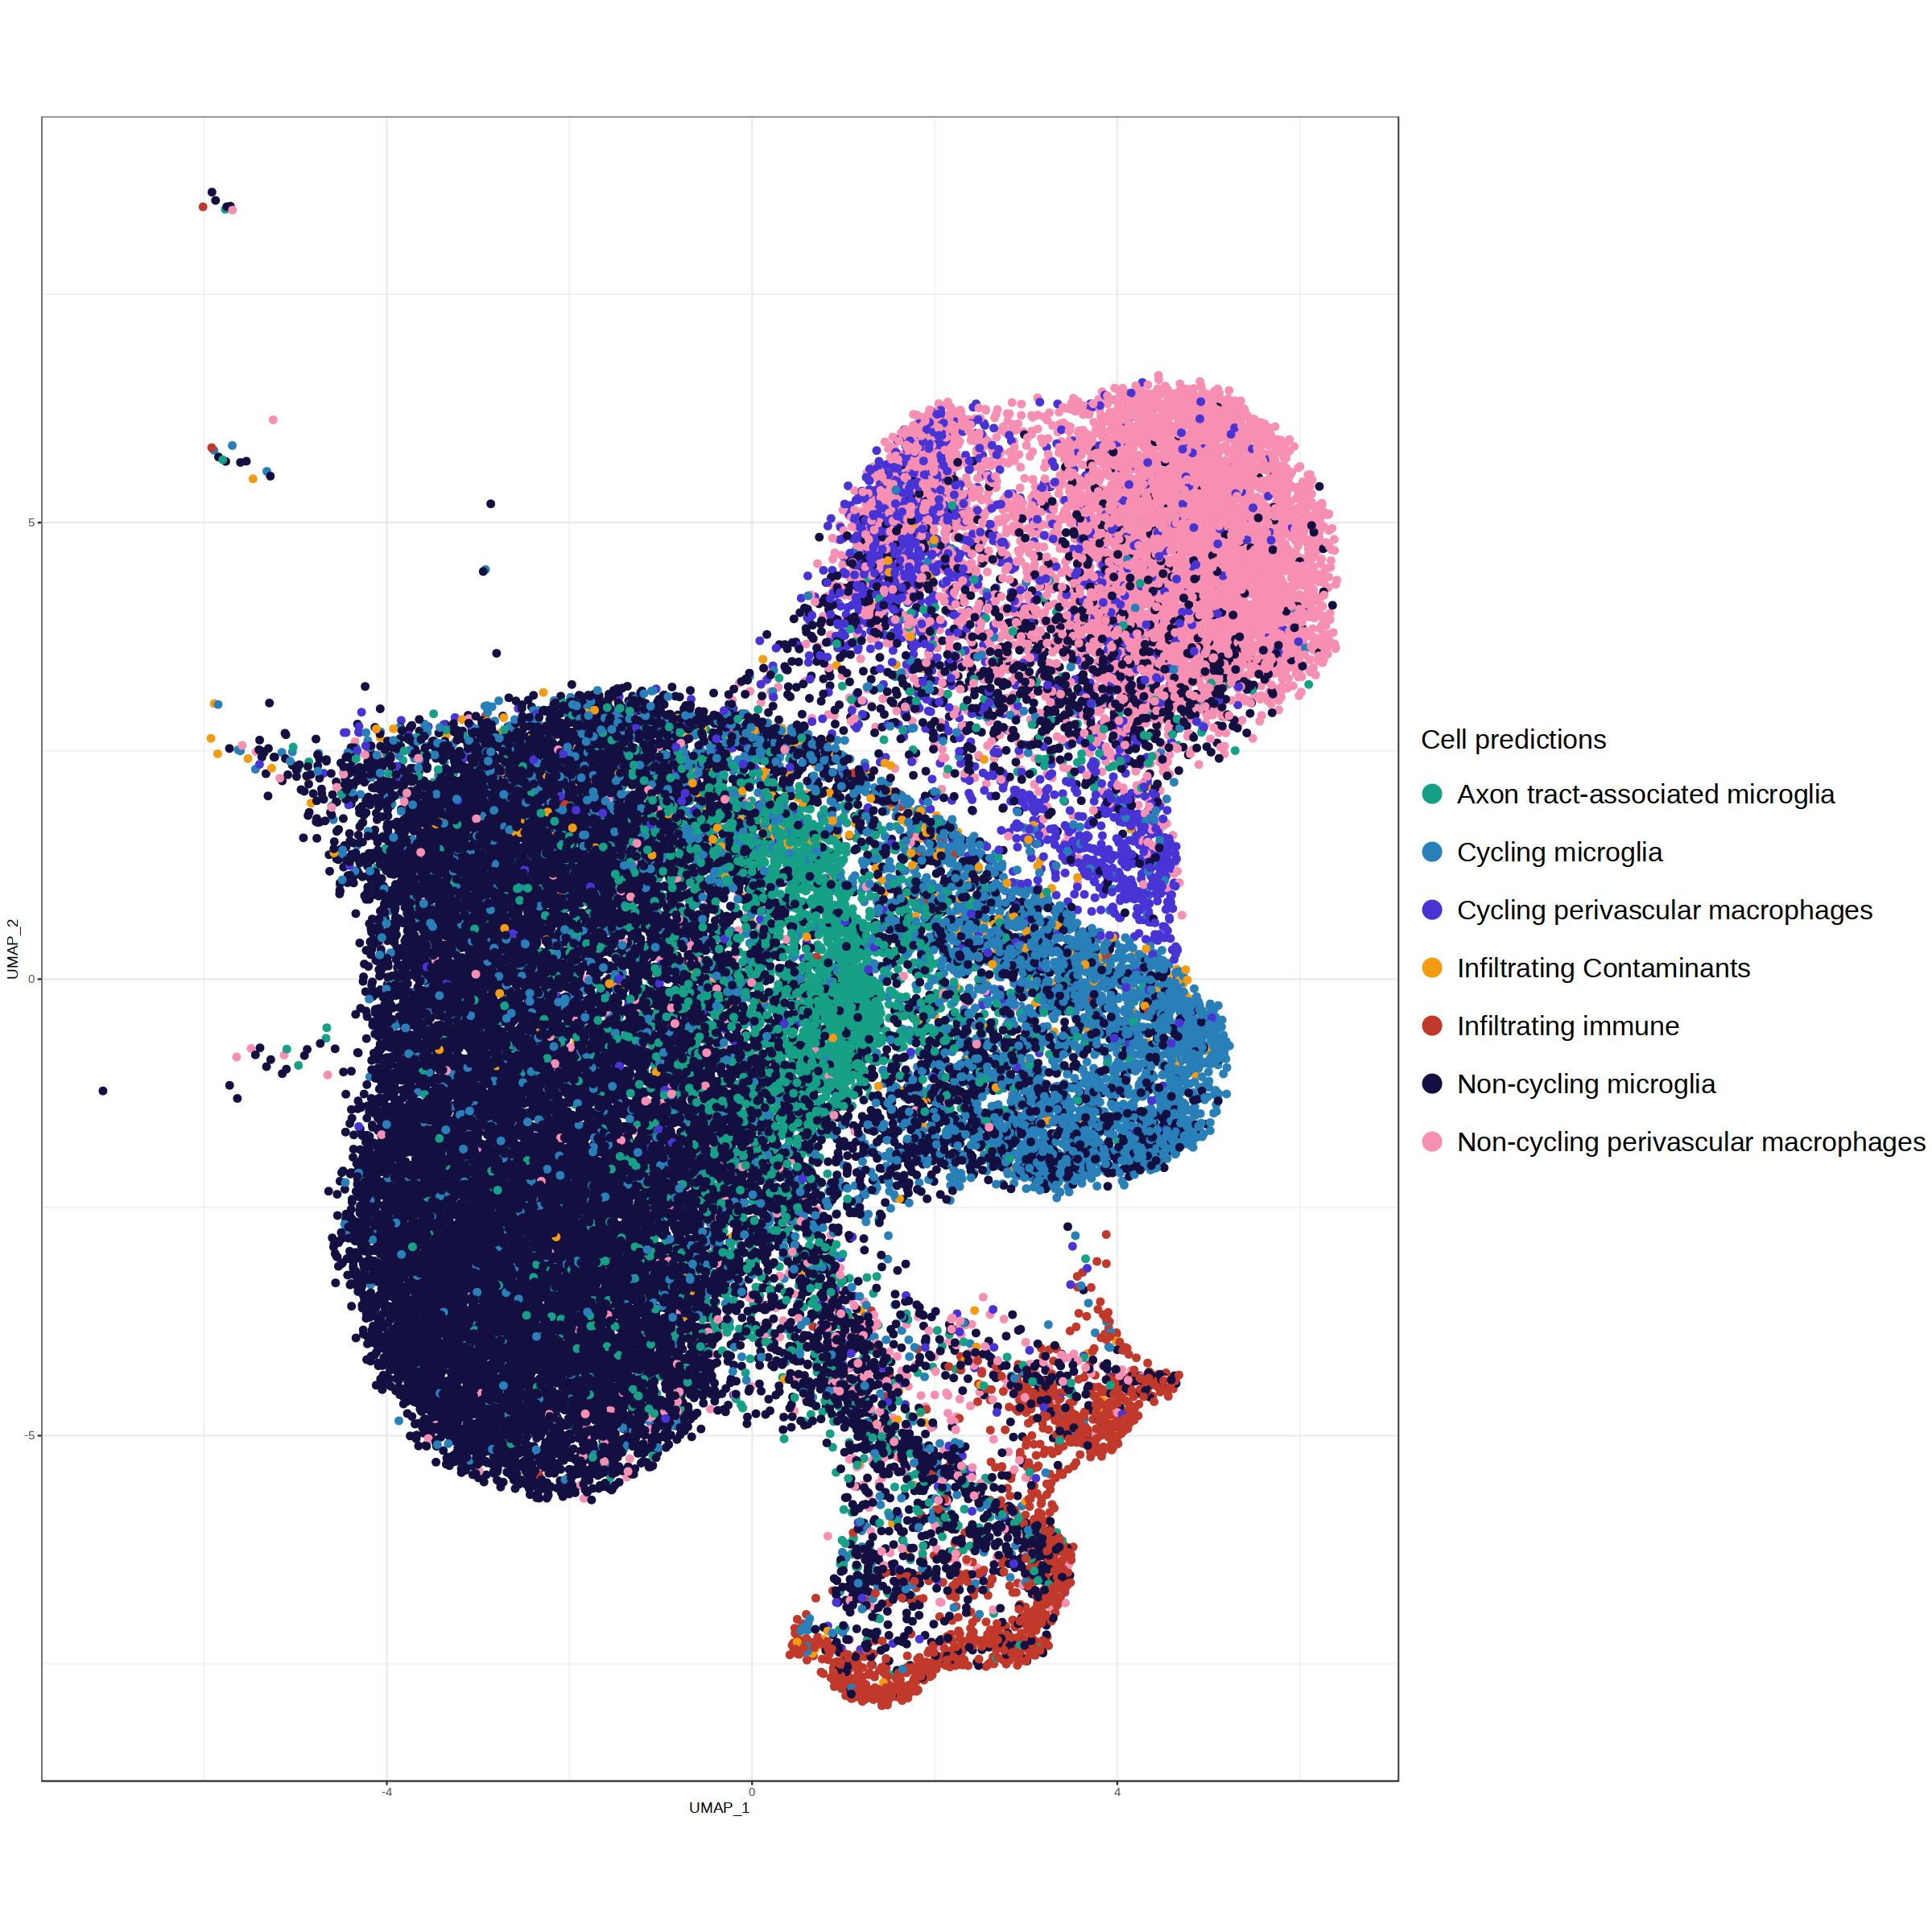

In [40]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = as.data.frame(microglia_filter@reductions$umap@cell.embeddings)$UMAP_1,
    UMAP_2 = as.data.frame(microglia_filter@reductions$umap@cell.embeddings)$UMAP_2,
    predictions = microglia_filter@meta.data$predictions
  ) %>%
  group_by(predictions) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

plot <- bind_cols(microglia_filter@meta.data, as.data.frame(microglia_filter@reductions$umap@cell.embeddings)) %>%
  ggplot(aes(UMAP_1, UMAP_2, color = predictions)) +
  geom_point(size = 2) +
  theme_bw() +
  scale_color_manual(values = custom_colors$discrete) +
  labs(color = 'Cell predictions') +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  theme(legend.position = 'right',
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.key.height = unit(3,"line")
       ) +
  coord_fixed()

plot

In [42]:
ggsave(
  '/home/adufour/work/notebook/plots/Microglia/microglia_predictions.png',
  plot,
  height = 17,
  width = 20
)